In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [4]:
df = pd.read_csv('../dataset/Student_performance.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")

Dataset loaded successfully!
Shape: (6607, 20)


In [5]:
print("First 10 rows")
print(df.head(10))
print("\n" + "="*50 + "\n")
print("Column Name and Types:")
print(df.info())
print("\n" + "="*50 + "\n")
print("Numerical Summary:")
print(df.describe())
print("\n" + "="*50 + "\n")
print("Missing Values:")
print(df.isnull().sum())

First 10 rows
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   
5             19          88               Medium              Medium   
6             29          84               Medium                 Low   
7             25          78                  Low                High   
8             17          94               Medium                High   
9             23          98               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                       

## Data Understanding

**Dataset Shape**  (6607,20)
**Target variables (scores):** Previous Scores

**Categorical features:**  Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,
Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender

**Numerical features:** Hours_Studied, Attendance, Sleep_Hours, Tutoring_Sessions, Physical_Activity

**Missing values:** Teacher_Quality, Parental_Education_Level, Distance_from_Home 

In [6]:
print("Columns in dataset:")
print(df.columns.tolist())

Columns in dataset:
['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']


In [7]:
print("Gender distribution:")
print(df['Gender'].value_counts())
print("\n")

Gender distribution:
Gender
Male      3814
Female    2793
Name: count, dtype: int64




In [8]:
gender_stats = df.groupby('Gender')['Exam_Score'].agg([
    'count',
    'mean',
    'std',
    'min',
    'max'
]).round(2)

print("Exam Score Statistics by Gender:")
print(gender_stats)
print("\n")

Exam Score Statistics by Gender:
        count   mean   std  min  max
Gender                              
Female   2793  67.24  4.05   57  101
Male     3814  67.23  3.77   55   99




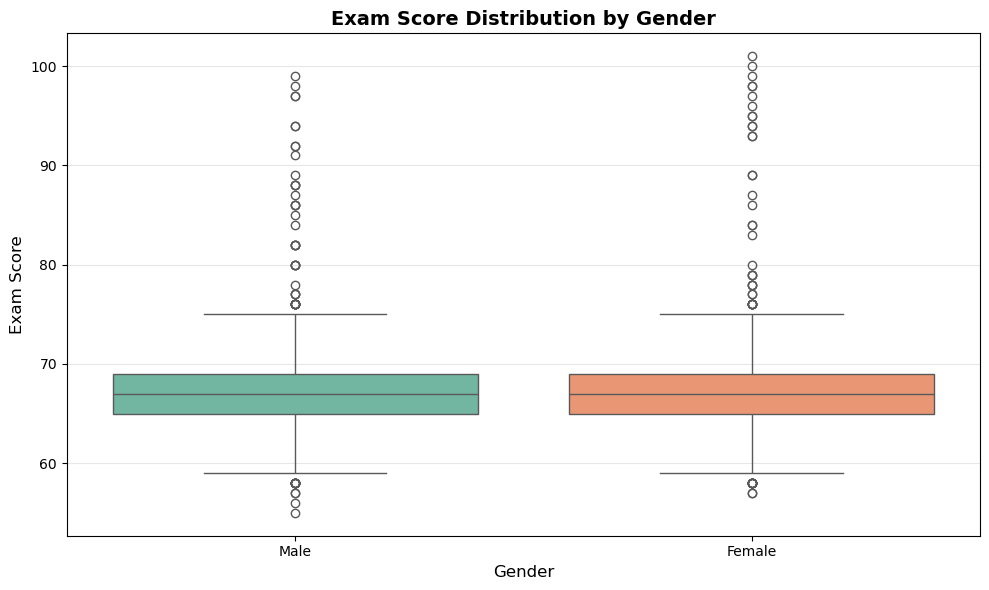

Chart saved: exam_score_by_gender.png


In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Exam_Score', hue='Gender', palette='Set2', legend=False)
plt.title('Exam Score Distribution by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.savefig('exam_score_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: exam_score_by_gender.png")

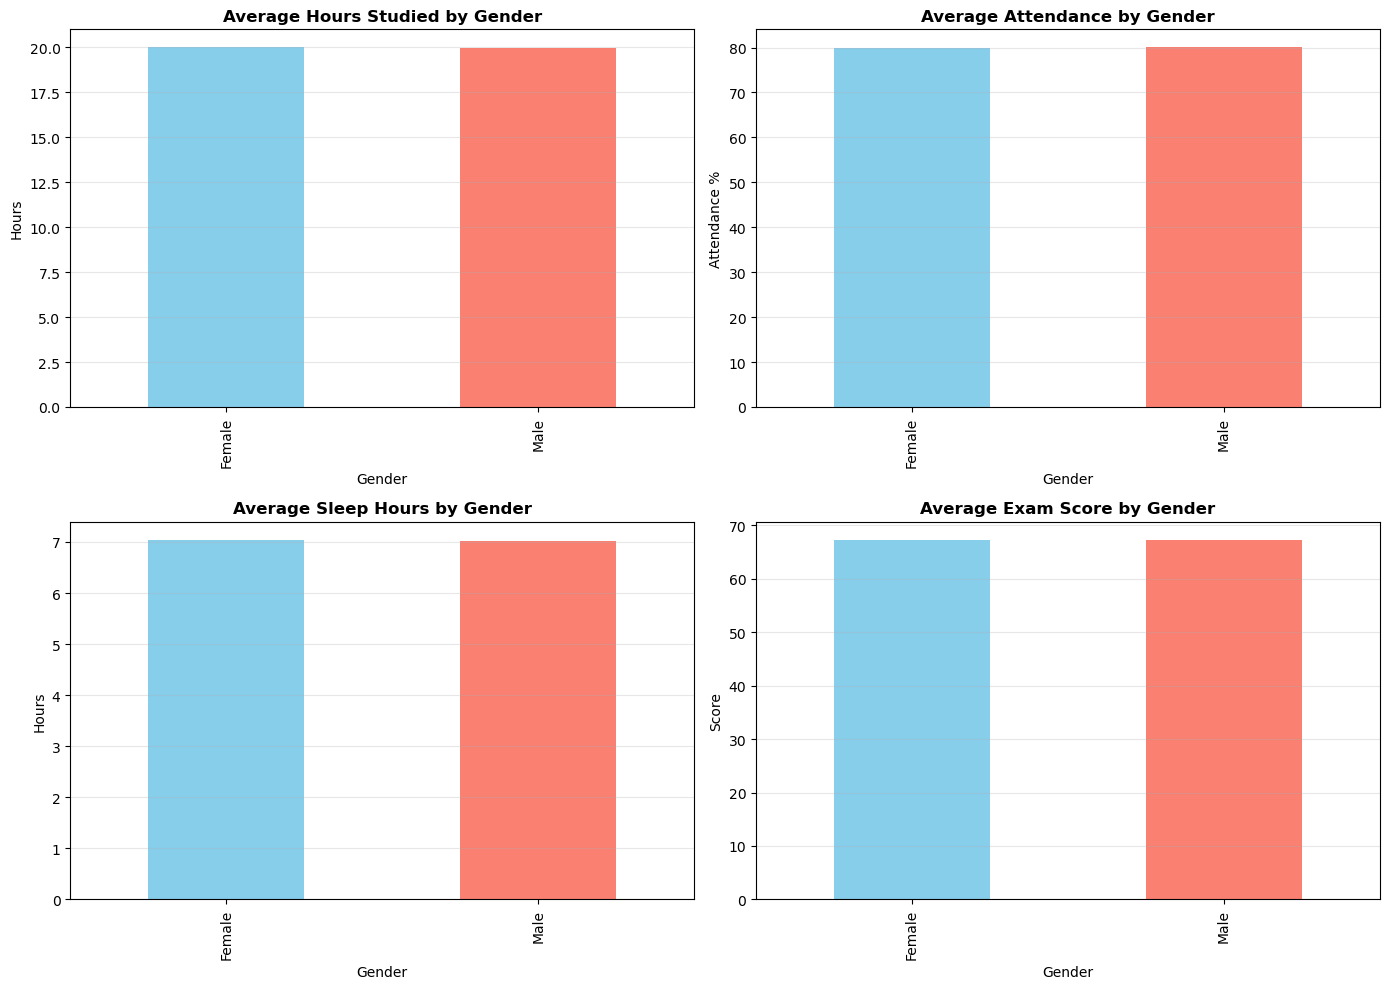

Chart saved: gender_comparison_grid.png


In [10]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Hours Studied
df.groupby('Gender')['Hours_Studied'].mean().plot(kind='bar', ax=axes[0,0], color=['skyblue', 'salmon'])
axes[0,0].set_title('Average Hours Studied by Gender', fontweight='bold')
axes[0,0].set_ylabel('Hours')
axes[0,0].set_xlabel('Gender')
axes[0,0].grid(axis='y', alpha=0.3)

# Attendance
df.groupby('Gender')['Attendance'].mean().plot(kind='bar', ax=axes[0,1], color=['skyblue', 'salmon'])
axes[0,1].set_title('Average Attendance by Gender', fontweight='bold')
axes[0,1].set_ylabel('Attendance %')
axes[0,1].set_xlabel('Gender')
axes[0,1].grid(axis='y', alpha=0.3)

# Sleep Hours
df.groupby('Gender')['Sleep_Hours'].mean().plot(kind='bar', ax=axes[1,0], color=['skyblue', 'salmon'])
axes[1,0].set_title('Average Sleep Hours by Gender', fontweight='bold')
axes[1,0].set_ylabel('Hours')
axes[1,0].set_xlabel('Gender')
axes[1,0].grid(axis='y', alpha=0.3)

# Exam Score
df.groupby('Gender')['Exam_Score'].mean().plot(kind='bar', ax=axes[1,1], color=['skyblue', 'salmon'])
axes[1,1].set_title('Average Exam Score by Gender', fontweight='bold')
axes[1,1].set_ylabel('Score')
axes[1,1].set_xlabel('Gender')
axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('gender_comparison_grid.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: gender_comparison_grid.png")

In [12]:
# Analysis 2: Performance by Parental Education Level

print("Parental Education Levels:")
print(df['Parental_Education_Level'].value_counts())
print("\n")

# GroupBy Parental Education
parent_ed_stats = df.groupby('Parental_Education_Level').agg({
    'Exam_Score': ['count', 'mean', 'std', 'min', 'max'],
    'Hours_Studied': 'mean',
    # 'Access_to_Resources': 'mean',
    'Tutoring_Sessions': 'mean'
}).round(2)

print("Statistics by Parental Education Level:")
print(parent_ed_stats)

Parental Education Levels:
Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64


Statistics by Parental Education Level:
                         Exam_Score                       Hours_Studied  \
                              count   mean   std min  max          mean   
Parental_Education_Level                                                  
College                        1989  67.32  3.83  56  100         19.85   
High School                    3223  66.89  3.98  55  101         20.04   
Postgraduate                   1305  67.97  3.69  57   98         19.96   

                         Tutoring_Sessions  
                                      mean  
Parental_Education_Level                    
College                               1.50  
High School                           1.49  
Postgraduate                          1.50  


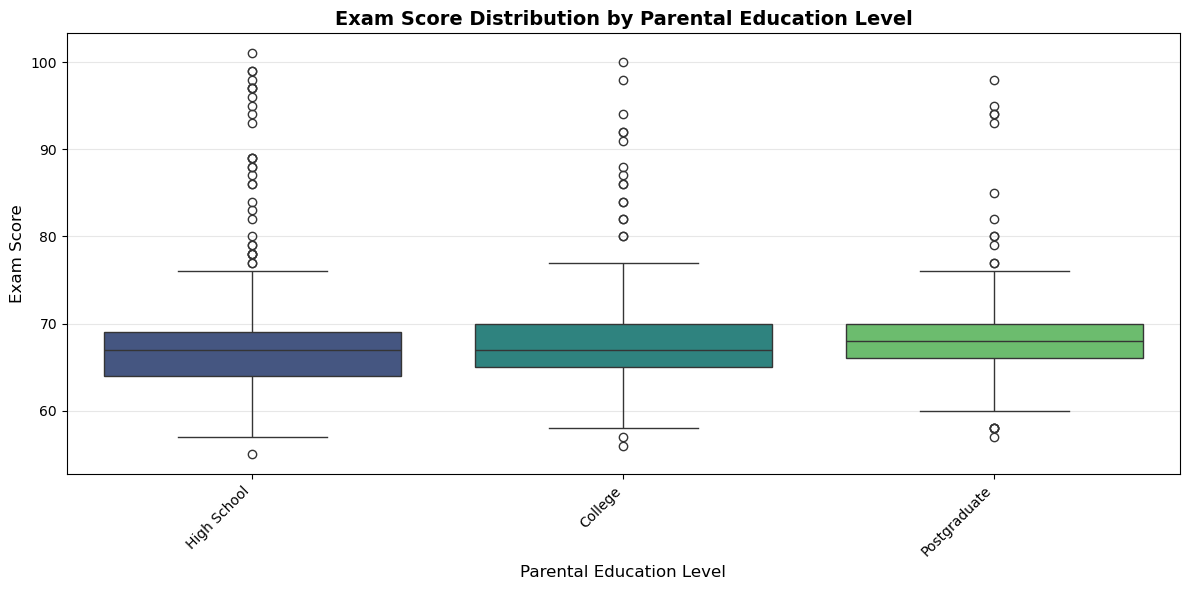

Chart saved: exam_score_by_parent_education.png


In [14]:
# Visualization: Exam Score by Parental Education

# Create ordered version (if education levels have order)
# Adjust order based on what you see in data
education_order = df.groupby('Parental_Education_Level')['Exam_Score'].mean().sort_values().index

plt.figure(figsize=(12, 6))
sns.boxplot(data=df,x='Parental_Education_Level',
    y='Exam_Score',
    hue='Parental_Education_Level', 
    order=education_order,
    palette='viridis',
    legend=False)
plt.title('Exam Score Distribution by Parental Education Level', 
          fontsize=14, fontweight='bold')
plt.xlabel('Parental Education Level', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.savefig('exam_score_by_parent_education.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: exam_score_by_parent_education.png")

In [15]:
# Analysis 3: Multi-level GroupBy - Gender + Parental Education

multi_group = df.groupby(['Gender', 'Parental_Education_Level'])['Exam_Score'].agg([
    'count',
    'mean',
    'std'
]).round(2)

print("Exam Scores by Gender AND Parental Education:")
print(multi_group)
print("\n")

# Who performs best? (Highest mean score combination)
best_combo = multi_group['mean'].idxmax()
best_score = multi_group['mean'].max()
print(f"Best performing group: {best_combo}")
print(f"Average score: {best_score}")

Exam Scores by Gender AND Parental Education:
                                 count   mean   std
Gender Parental_Education_Level                    
Female College                     855  67.37  3.87
       High School                1354  66.93  4.24
       Postgraduate                549  67.89  3.83
Male   College                    1134  67.27  3.81
       High School                1869  66.87  3.77
       Postgraduate                756  68.03  3.59


Best performing group: ('Male', 'Postgraduate')
Average score: 68.03
